# Run regrid operation on CMIP6

**Rooki** calls climate data operations on the **rook** processing service.

In [1]:
import os
os.environ['ROOK_URL'] = 'http://rook.dkrz.de/wps'

from rooki import rooki
from rooki import operators as ops

## Parameters of regrid operation

In [2]:
rooki.regrid?

Signature: rooki.regrid(collection, method='nearest_s2d', grid='auto')
Docstring:
Run regridding operator on climate model data using daops (xarray).

Parameters
----------
collection : string
    A dataset identifier or list of comma separated identifiers. Example: c3s-cmip5.output1.ICHEC.EC-EARTH.historical.day.atmos.day.r1i1p1.tas.latest
method : {'nearest_s2d', 'bilinear', 'conservative', 'patch'}string
    Please specify regridding method like consevative or bilinear. Default: nearest_s2d
grid : {'auto', '0pt25deg', '0pt25deg_era5', '0pt5deg_lsm', '0pt625x0pt5deg', '0pt75deg', '1deg', '1pt25deg', '2pt5deg'}string
    Please specify output grid resolution for regridding. Default: auto

Returns
-------
output : ComplexData:mimetype:`application/metalink+xml; version=4.0`
    Metalink v4 document with references to NetCDF files.
prov : ComplexData:mimetype:`application/json`
    Provenance document using W3C standard.
prov_plot : ComplexData:mimetype:`image/png`
    Provenance docume

## workflow: subset only

In [3]:
tas = ops.Input(
    'tas', ['c3s-cmip6.CMIP.CNRM-CERFACS.CNRM-CM6-1.historical.r1i1p1f2.Amon.tas.gr.v20180917']
)

wf = ops.Subset(tas, time="2000-01/2000-01")

In [4]:
resp = wf.orchestrate()
resp.ok 

True

In [5]:
ds = resp.datasets()[0]
ds

<xarray.Dataset> Size: 134kB
Dimensions:      (lat: 128, lon: 256, time: 1, axis_nbounds: 2)
Coordinates:
  * lat          (lat) float64 1kB -88.93 -87.54 -86.14 ... 86.14 87.54 88.93
  * lon          (lon) float64 2kB 0.0 1.406 2.812 4.219 ... 355.8 357.2 358.6
    height       float64 8B ...
  * time         (time) datetime64[ns] 8B 2000-01-16T12:00:00
Dimensions without coordinates: axis_nbounds
Data variables:
    time_bounds  (time, axis_nbounds) datetime64[ns] 16B ...
    tas          (time, lat, lon) float32 131kB ...
Attributes: (12/54)
    name:                   /scratch/work/voldoire/outputs/CMIP6/DECK/CNRM-CM...
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2018-06-20T08:40:07Z
    description:            CMIP6 historical
    title:                  CNRM-CM6-1 model output prepared for CMIP6 / CMIP...
    activity_id:            CMIP
    ...                     ...
    xios_commit:            1442-shuffle
    nemo_gelato_commit:     49095b3accd5d4c_6524fe19b00467a
    arpege_minor_version:   6.3.2
    tracking_id:            hdl:21.14100/87bf0ea8-e604-4581-b49d-0f98831346b1
    history:                Mon Jul 30 11:58:29 2018: ncatted -O -a tracking_...
    NCO:                    "4.5.5"

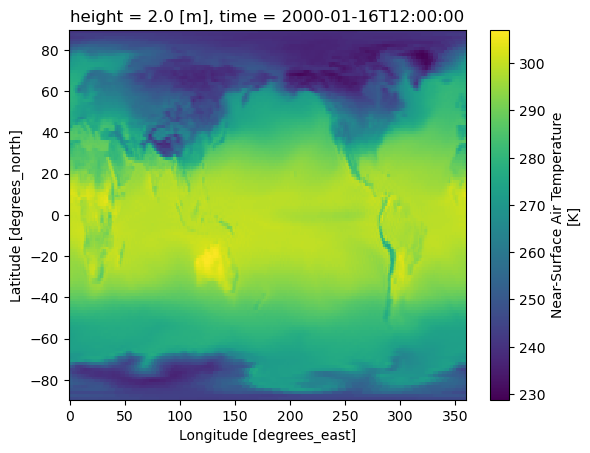

In [6]:
ds.tas.isel(time=0).plot()

## workflow: subset + regrid


In [7]:
tas = ops.Input(
    'tas', ['c3s-cmip6.CMIP.CNRM-CERFACS.CNRM-CM6-1.historical.r1i1p1f2.Amon.tas.gr.v20180917']
)

wf = ops.Subset(tas, time="2000-01/2000-01")

wf = ops.Regrid(wf, method="nearest_s2d", grid="1deg")

In [8]:
resp = wf.orchestrate()
resp.ok 

True

In [9]:
ds = resp.datasets()[0]
ds

<xarray.Dataset> Size: 272kB
Dimensions:      (lat: 180, lon: 360, bnds: 2, time: 1, axis_nbounds: 2)
Coordinates:
  * lat          (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon          (lon) float64 3kB 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
    lat_bnds     (lat, bnds) float64 3kB ...
    lon_bnds     (lon, bnds) float64 6kB ...
    height       float64 8B ...
  * time         (time) datetime64[ns] 8B 2000-01-16T12:00:00
    time_bounds  (time, axis_nbounds) datetime64[ns] 16B ...
Dimensions without coordinates: bnds, axis_nbounds
Data variables:
    tas          (time, lat, lon) float32 259kB ...
Attributes: (12/59)
    name:                         /scratch/work/voldoire/outputs/CMIP6/DECK/C...
    Conventions:                  CF-1.7 CMIP-6.2
    creation_date:                2018-06-20T08:40:07Z
    description:                  CMIP6 historical
    title:                        CNRM-CM6-1 model output prepared for CMIP6 ...
    activity_id:                  CMIP
    ...                           ...
    grid_original:                data regridded to a T127 gaussian grid (128...
    grid_label_original:          gr
    nominal_resolution_original:  250 km
    regrid_operation:             nearest_s2d_128x256_180x360_peri
    regrid_tool:                  xESMF_v0.8.6
    regrid_weights_uid:           90229ccc58a26ce268bc1fc5d0f7414a_d24f4f689f...

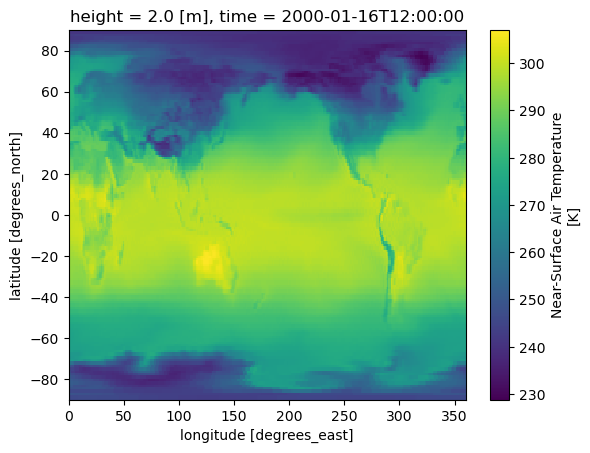

In [10]:
ds.tas.isel(time=0).plot()